Metrics Data:
  Threshold ship Scenario    Temp   speed      ph     Temp.1   speed.1  \
0         L  JG1     hist  0.1000  0.1000  0.1000  10.260225  3.248809   
1         H  JG1     hist  0.0500  0.0500  0.0500  10.388571  3.445054   
2         L  JG1      ssp  0.2367  0.1010  0.2366  10.484623  3.249637   
3         H  JG1      ssp  0.1763  0.0508  0.1767  10.601791  3.444640   
4         L   GB     hist  0.1000  0.1000  0.1000   4.979200  1.540000   

       ph.1  
0  0.223156  
1  0.145735  
2  0.443415  
3  0.353986  
4  0.107200  


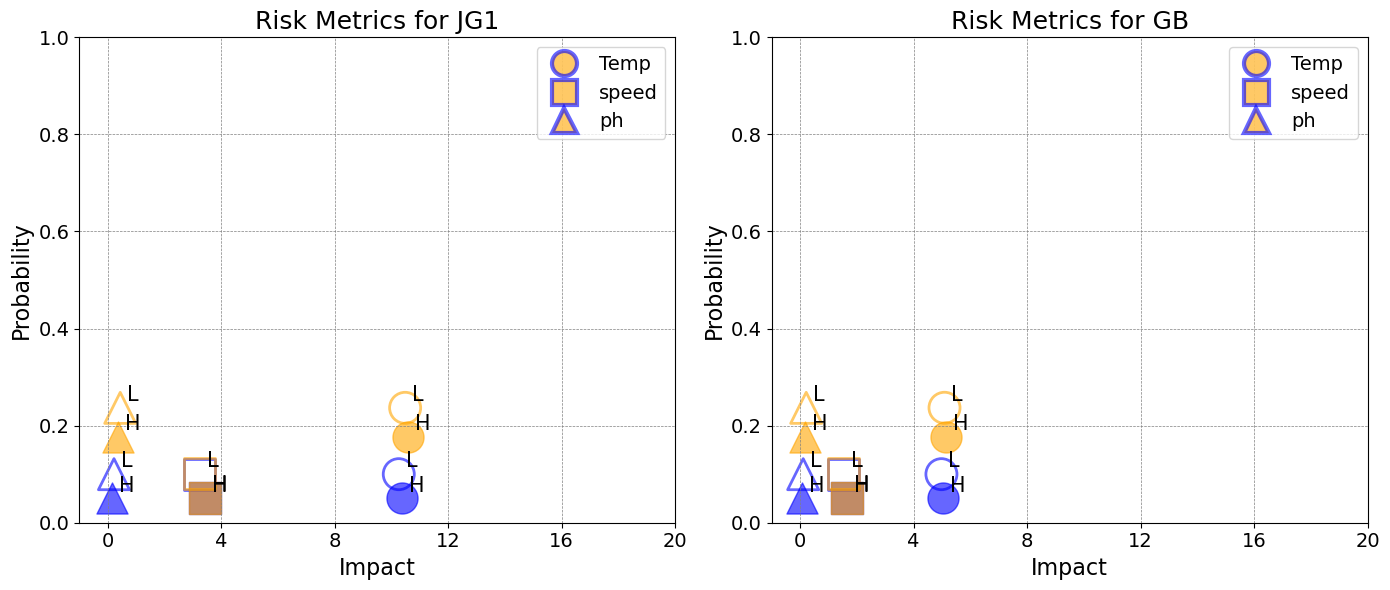

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Define the file path for the metrics CSV file
metrics_file = "/lfs/home/ioloi/lfs_dir/project_UCH/03_csv/UCH_RiskData_metrics.0406.csv"

# Read the CSV file using the second row (index=1) as the header
df_metrics = pd.read_csv(metrics_file, header=1)

# Strip whitespace from column names to ensure proper matching
df_metrics.columns = df_metrics.columns.str.strip()

print("Metrics Data:")
print(df_metrics.head())

# Filter the DataFrame for each ship
df_jg1 = df_metrics[df_metrics['ship'] == 'JG1']
df_gb  = df_metrics[df_metrics['ship'] == 'GB']

# Create a figure with two subplots (one for each ship)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Define the column pairs to plot:
# For Temp: x = "Temp.1", y = "Temp"
# For speed: x = "speed.1", y = "speed"
# For ph: x = "ph.1", y = "ph"
pairs = [('Temp.1', 'Temp'), ('speed.1', 'speed'), ('ph.1', 'ph')]
# Marker shapes for each variable: circle, square, triangle
markers = ['o', 's', '^']
# Scenario color mapping: "hist" is blue, "ssp" is orange.
color_map = {'hist': 'blue', 'ssp': 'orange'}
# Define thresholds: we use "L" for hollow (representing "90%/10%") and "H" for filled (representing "95%/5%")
threshold_L = "L"
threshold_H = "H"

# Function to annotate points with threshold text only
def annotate_points(ax, df, xcol, ycol):
    for _, row in df.iterrows():
        text = f"{row['Threshold']}"
        ax.annotate(text,
                    (row[xcol], row[ycol]),
                    textcoords="offset points",
                    xytext=(5, 5),
                    fontsize=15,
                    color="black")

# Define a function to plot scatter data for a given ship's dataframe on an axis
def plot_ship(ax, ship_df, ship_name):
    # For each variable pair
    for (xcol, ycol), marker in zip(pairs, markers):
        # For each scenario ("hist" and "ssp")
        for scenario in ['hist', 'ssp']:
            # For each threshold: L and H
            for thresh in [threshold_L, threshold_H]:
                sub_df = ship_df[(ship_df['Scenario'] == scenario) & (ship_df['Threshold'] == thresh)]
                if sub_df.empty:
                    continue
                # Determine marker fill and edge linewidth:
                if thresh == threshold_L:  # hollow markers for L
                    facecolors = 'none'
                    lw = 2  # thicker edge for hollow markers
                else:  # filled markers for H
                    facecolors = color_map[scenario]
                    lw = 1
                ax.scatter(sub_df[xcol], sub_df[ycol],
                           marker=marker,
                           s=500,  # marker size increased
                           facecolors=facecolors,
                           edgecolors=color_map[scenario],
                           alpha=0.6,
                           linewidths=lw)
                # Annotate points (with threshold only)
                annotate_points(ax, sub_df, xcol, ycol)
    ax.set_xlabel('Impact', fontsize=16)
    ax.set_ylabel('Probability', fontsize=16)
    ax.set_title(f"Risk Metrics for {ship_name}", fontsize=18)
    ax.set_xlim(-1, 20)
    ax.set_xticks(np.arange(0, 21, 4))
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    # Create custom legend: one entry per variable (use proxy artists)
    proxies = []
    labels = []
    for (xcol, ycol), marker in zip(pairs, markers):
        proxy = Line2D([0], [0], marker=marker, color='w',
                       markerfacecolor=color_map['ssp'],
                       markeredgecolor=color_map['hist'],
                       markersize=18, alpha=0.6, markeredgewidth=3)
        proxies.append(proxy)
        labels.append(ycol)
    ax.legend(proxies, labels, fontsize=14)

# Plot for each ship
plot_ship(axs[0], df_jg1, "JG1")
plot_ship(axs[1], df_gb, "GB")

plt.tight_layout()
plt.show()
